In [3]:
from __init__ import Database
from matplotlib import pyplot as plt
import sklearn.feature_extraction.image
from sklearn.feature_extraction.image import extract_patches
import tables

In [5]:
from extractor import extractor_super_resolution
args = {}
args['filedir'] = 'ImageNet_flowers'
args['pattern'] = '*.bmp'
args['database_name'] = 'mock'
args['export_dir'] = 'export'
args['data_shape'] = {"img":(64,64,3),"label":(64,64,3)}
args['pattern'] = '*.JPEG'
args['chunk_width'] = 16
args['meta'] = {
    'stride_size':32,
}
args['group_level'] = 1
args['extractor'] = extractor_super_resolution
data_set = Database(**args)

In [6]:
print('patch-level size',data_set.write_data())

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 85.83it/s]


patch-level size {'img': 28246, 'label': 28246}


In [7]:
#get img and label
mock_im,mock_label = data_set['val',1]
print('type',type(mock_im))
print('len',len(mock_im))
print("shape:",mock_im[0].shape)
print("Image level dataset size -train", data_set.size('train'))
print("Image level dataset size -val", data_set.size('val'))

type <class 'list'>
len 1
shape: (228, 64, 64, 3)
Image level dataset size -train 192
Image level dataset size -val 22


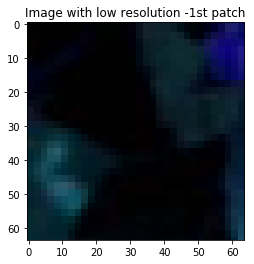

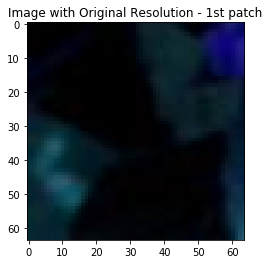

In [9]:
plt.figure()
plt.title("Image with low resolution -1st patch")
plt.imshow(mock_im[0][0])
plt.figure()
plt.title("Image with Original Resolution - 1st patch")
_ = plt.imshow(mock_label[0][0])

In [10]:
args_recover = {}
args_recover['database_name'] = 'mock'
args_recover['export_dir'] = 'export'
args_recover['readonly'] = True
data_recover = Database(**args_recover)

In [12]:
print(data_recover['train',0][0][0].shape)

(6, 64, 64, 3)


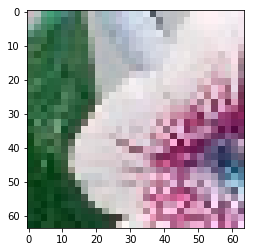

In [14]:
plt.imshow(data_recover['train',0][0][0][0])